# 'Open source RS & GIS' YouTube Channel
https://www.youtube.com/channel/UCHR6Noc3rgFjOTtj8KX4buQ
#### Coded by: Narges Takhtkeshha (narges98.t@gmail.com)

In [1]:
from osgeo import gdal_array
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Data reading
data_dir=r'C:\Users\ASUSCenter\Desktop\Landsat8\landsat8.tif'
img=gdal_array.LoadFile(data_dir)

In [3]:
img.shape

(9, 329, 332)

# Landsat8 Bands

![Landsat8](https://www.researchgate.net/profile/Bakenaz-Zeidan/publication/327212711/figure/tbl3/AS:668486690934791@1536391055484/Landsat-8-Bands-Designations.png)

In [4]:
B=img[1]
G=img[2]
R=img[3]
NIR=img[4]

In [5]:
rgb_img=np.dstack([R,G,B])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


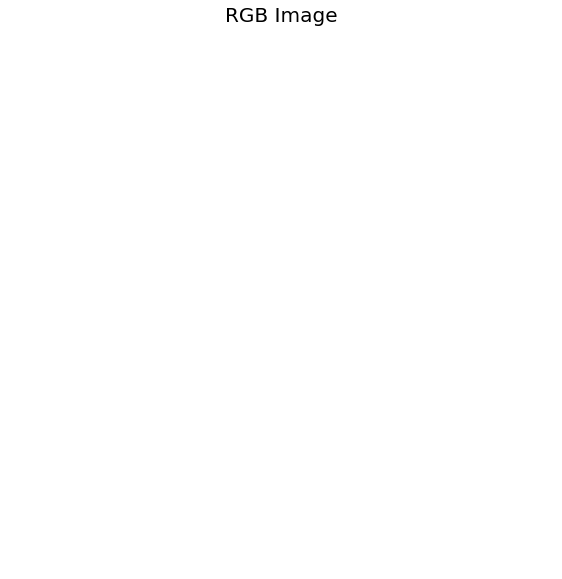

In [6]:
plt.figure(figsize=(10,10))
plt.imshow((rgb_img))#.astype(np.uint8)
plt.title('RGB Image',fontsize=20)
plt.axis('off')
plt.show()

In [7]:
#A function for normalizing a band
def normalizing(band):
    normalized=(band-np.amin(band))/(np.amax(band)-np.amin(band))
    return normalized

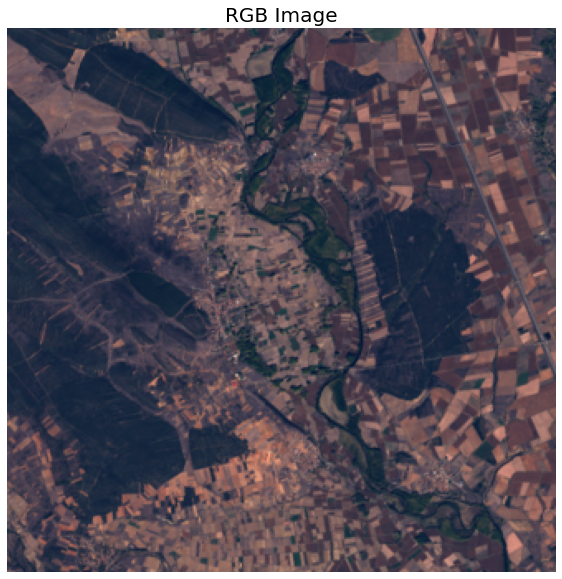

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(normalizing(rgb_img))#.astype(np.uint8)
plt.title('RGB Image',fontsize=20)
plt.axis('off')
plt.show()

# NDVI Vegetation Index

NDVI

In [9]:
NDVI=(NIR-R)/(NIR+R)

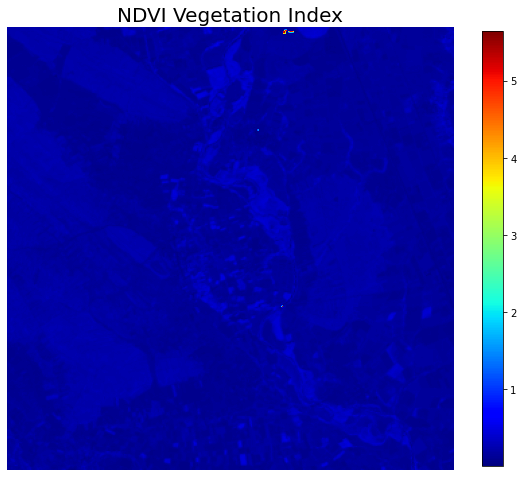

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(NDVI,'jet')
plt.title('NDVI Vegetation Index',fontsize=20)
plt.colorbar(shrink=0.8)
plt.axis('off')
plt.show()

In [11]:
# Detect vegetation using thresholding over NDVI index
Vegetation=np.zeros((R.shape[0],R.shape[1]))
Vegetation[NDVI>0.3]=1

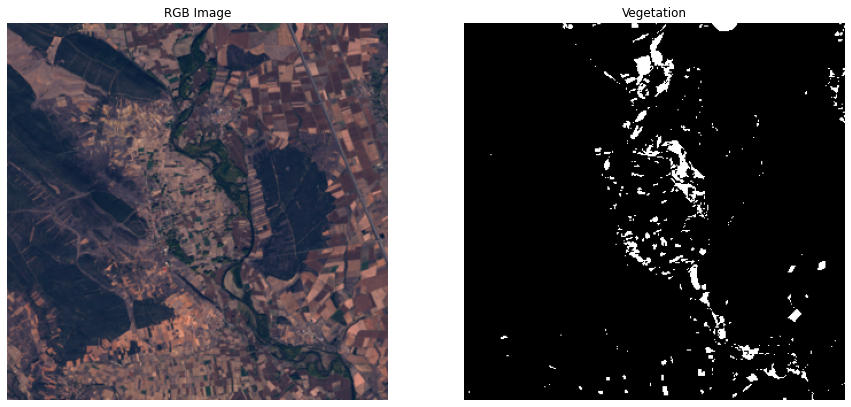

In [12]:
fig, ax = plt.subplots(figsize=(15,15),ncols=2)

ax[0].imshow(normalizing(rgb_img))
ax[0].title.set_text('RGB Image')

ax[1].imshow(Vegetation,'gray')
ax[1].title.set_text('Vegetation')

[axi.set_axis_off() for axi in ax]
plt.show()

# :)